# Rossmann Pharmaceutical Sales

### Explanatory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [150]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from cleaner import *
from visualizer import *

### Reading Data

In [3]:
# reading the store csv file
store_df = pd.read_csv("../data/store.csv")
store_df.head(10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [4]:
# reading the sales training csv file
train_df = pd.read_csv("../data/train.csv")
train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [5]:
# number of elements in the store df
store_df.size

11150

In [6]:
# rows and columns in the df
store_df.shape

(1115, 10)

In [7]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
# number of elements in the train df
train_df.size

9154881

In [9]:
# rows and columns in the df
train_df.shape

(1017209, 9)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### Missing Values

In [11]:
percent_missing_values(store_df)

The dataset contains 21.01 % missing values.


In [12]:
missing_df = missing_values_table(store_df)

Your selected dataframe has 10 columns.
There are 6 columns that have missing values.


In [13]:
missing_df

,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.79,float64
Promo2SinceYear,544,48.79,float64
PromoInterval,544,48.79,object
CompetitionOpenSinceMonth,354,31.75,float64
CompetitionOpenSinceYear,354,31.75,float64
CompetitionDistance,3,0.27,float64


In [14]:
max_dist = store_df['CompetitionDistance'].max()
max_dist

75860.0

In [15]:
fix_missing_value(store_df, ['CompetitionDistance'], max_dist)

3 missing values in the column CompetitionDistance have been replaced by 75860.0.


In [16]:
# final check for missing values
percent_missing_values(store_df)

The dataset contains 20.99 % missing values.


In [17]:
min_year = store_df['CompetitionOpenSinceYear'].min()
min_year

1900.0

In [18]:
# impute the column CompetitionOpenSinceYear with 1900 and the column CompetitionOpenSinceMonth with 1
fix_missing_value(store_df, ['CompetitionOpenSinceYear'], min_year)
fix_missing_value(store_df, ['CompetitionOpenSinceMonth'], 1)

354 missing values in the column CompetitionOpenSinceYear have been replaced by 1900.0.
354 missing values in the column CompetitionOpenSinceMonth have been replaced by 1.


In [19]:
fix_missing_value(store_df, ['Promo2SinceWeek', 'Promo2SinceYear'], 0)

544 missing values in the column Promo2SinceWeek have been replaced by 0.
544 missing values in the column Promo2SinceYear have been replaced by 0.


In [20]:
fix_missing_value(store_df, ['PromoInterval'], '0,0,0,0')

544 missing values in the column PromoInterval have been replaced by 0,0,0,0.


In [21]:
# final check for missing values
percent_missing_values(store_df)

The dataset contains 0.0 % missing values.


In [22]:
percent_missing_values(train_df)

The dataset contains 0.0 % missing values.


## Data Types

In [24]:
store_df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [25]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"0,0,0,0"
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"0,0,0,0"


##### StoreType, Assortment and PromoInterval hold string values. we will change this object types to string.

In [26]:
# get the columns with object data type
string_columns = store_df.select_dtypes(include='object').columns.tolist()
string_columns

['StoreType', 'Assortment', 'PromoInterval']

In [27]:
convert_to_string(store_df, string_columns)

In [28]:
convert_to_int(store_df, ['CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear',
        'Promo2SinceWeek', 'Promo2SinceYear'])

In [29]:
store_df.dtypes

Store                          int64
StoreType                     string
Assortment                    string
CompetitionDistance          float64
CompetitionOpenSinceMonth      int64
CompetitionOpenSinceYear       int64
Promo2                         int64
Promo2SinceWeek                int64
Promo2SinceYear                int64
PromoInterval                 string
dtype: object

In [30]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0"
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9,2009,0,0,0,"0,0,0,0"
4,5,a,a,29910.0,4,2015,0,0,0,"0,0,0,0"


In [31]:
train_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [32]:
train_df['StateHoliday'].value_counts().index


Index(['0', 0, 'a', 'b', 'c'], dtype='object')

#### Here 0 is represented as an integer and a string. Since there are other string values we will convert the StateHoliday column into string.




In [33]:
convert_to_string(train_df, ['StateHoliday'])

In [34]:
train_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     string
SchoolHoliday     int64
dtype: object

In [35]:
convert_to_datetime(train_df, ['Date'])

In [36]:
train_df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             string
SchoolHoliday             int64
dtype: object

## Duplicates

In [37]:
# search for duplicate rows and drop them
drop_duplicates(store_df)

No duplicate rows were found.


In [38]:
# search for duplicate rows and drop them
drop_duplicates(train_df)

No duplicate rows were found.


# Feature Engineering

In [140]:
train_df['Year'] = train_df['Date'].apply(lambda x: x.year)
train_df['Month'] = train_df['Date'].apply(lambda x: x.month)
train_df['DayOfMonth'] = train_df['Date'].apply(lambda x: x.day)
train_df['WeekOfYear'] = train_df['Date'].apply(lambda x: x.weekofyear)
train_df['weekday'] = train_df['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1)

In [141]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  string        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  DayOfMonth     1017209 non-null  int64         
 12  WeekOfYear     1017209 non-null  int64         
 13  weekday        1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(12), s

In [142]:
train_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,WeekOfYear,weekday
843192,1038,4,2013-06-06,6227,523,1,1,0,0,2013,6,6,23,1
838915,106,7,2013-06-09,0,0,0,0,0,0,2013,6,9,23,0
173823,999,4,2015-02-26,7444,544,1,0,0,0,2015,2,26,9,1
579255,241,2,2014-01-28,4796,556,1,0,0,0,2014,1,28,5,1
452892,988,4,2014-05-22,5873,864,1,1,0,0,2014,5,22,21,1
598871,902,6,2014-01-11,5566,674,1,0,0,0,2014,1,11,2,0
521079,45,5,2014-03-21,5831,425,1,1,0,0,2014,3,21,12,1
122375,841,1,2015-04-13,4571,530,1,1,0,0,2015,4,13,16,1
73362,888,3,2015-05-27,8390,710,1,0,0,0,2015,5,27,22,1
794495,286,5,2013-07-19,6329,535,1,1,0,1,2013,7,19,29,1


In [143]:
def getMonth(month_list, index):
    months = ['0', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    month_list = month_list.split(',')
    month = month_list[index]
    return months.index(month)

In [144]:
# split the PromoInterval column into 4 columns
store_df['PromoInterval0'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 0)))
store_df['PromoInterval1'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 1)))
store_df['PromoInterval2'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 2)))
store_df['PromoInterval3'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 3)))

In [145]:
store_df.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
105,106,a,a,1390.0,8,2013,0,0,0,"0,0,0,0",0,0,0,0
474,475,a,a,140.0,9,2005,0,0,0,"0,0,0,0",0,0,0,0
84,85,b,a,1870.0,10,2011,0,0,0,"0,0,0,0",0,0,0,0
532,533,a,c,5950.0,1,1900,0,0,0,"0,0,0,0",0,0,0,0
509,510,a,c,8260.0,1,1900,0,0,0,"0,0,0,0",0,0,0,0
76,77,d,c,1090.0,8,2009,1,10,2014,"Jan,Apr,Jul,Oct",1,4,7,10
863,864,a,a,1020.0,10,2012,1,45,2009,"Feb,May,Aug,Nov",2,5,8,11
178,179,a,c,480.0,1,1900,0,0,0,"0,0,0,0",0,0,0,0
512,513,a,a,400.0,8,2013,0,0,0,"0,0,0,0",0,0,0,0
945,946,a,a,2220.0,12,2011,1,14,2015,"Jan,Apr,Jul,Oct",1,4,7,10


In [146]:
# merging store_df and train_df
df = pd.merge(train_df, store_df, how='inner', on='Store')
df.shape

(1017209, 27)

# Univariate Analysis

### Non-Graphical Univariate Analysis

In [147]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
Year,1017209.0,2013.832292,0.777396,2013.0,2013.0,2014.0,2014.0,2015.0
Month,1017209.0,5.846762,3.326097,1.0,3.0,6.0,8.0,12.0
DayOfMonth,1017209.0,15.702790,8.787638,1.0,8.0,16.0,23.0,31.0


### Store Type

In [148]:
# unique value counts
counts_df = store_df['StoreType'].value_counts()
counts_df

a    602
d    348
c    148
b     17
Name: StoreType, dtype: Int64

In [189]:
plotly_plot_pie(store_df, 'StoreType')

### Assortment

In [152]:
# unique value counts
counts_df = store_df['Assortment'].value_counts()
counts_df

a    593
c    513
b      9
Name: Assortment, dtype: Int64

In [153]:
plotly_plot_pie(store_df, 'Assortment')

In [154]:
plotly_plot_hist(store_df, 'CompetitionDistance')

In [155]:
# unique value counts
counts_df = store_df['Promo2'].value_counts()
counts_df

1    571
0    544
Name: Promo2, dtype: int64

### Day Of Week

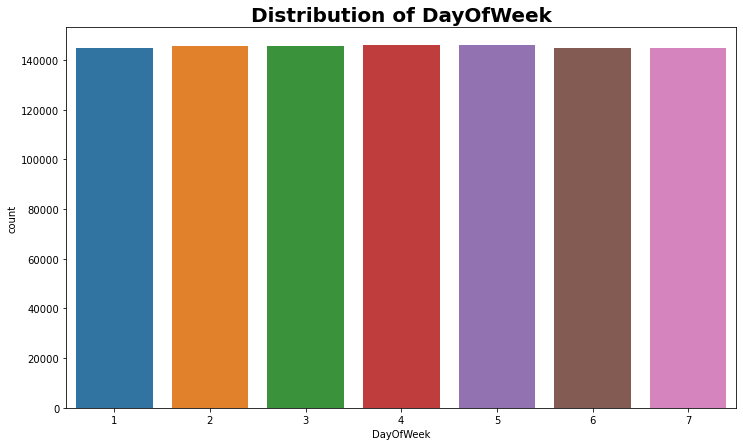

In [183]:
plot_count(train_df, 'DayOfWeek')

### Sales

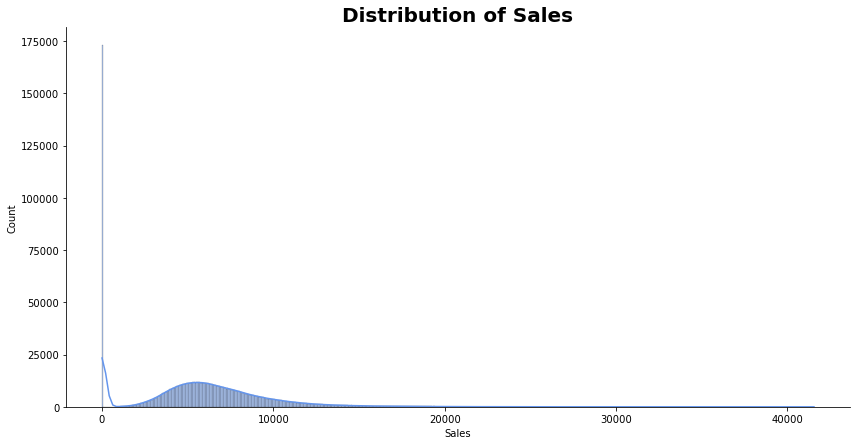

In [158]:
plot_hist(train_df, 'Sales')

### Customers

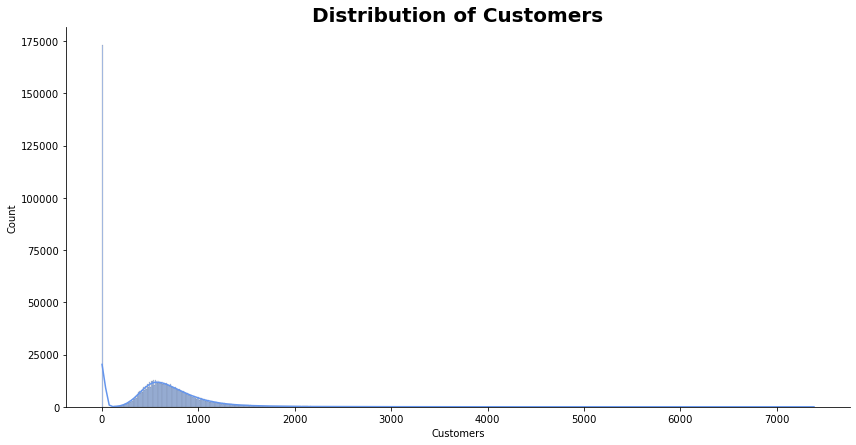

In [160]:
plot_hist(train_df, 'Customers')

### Open

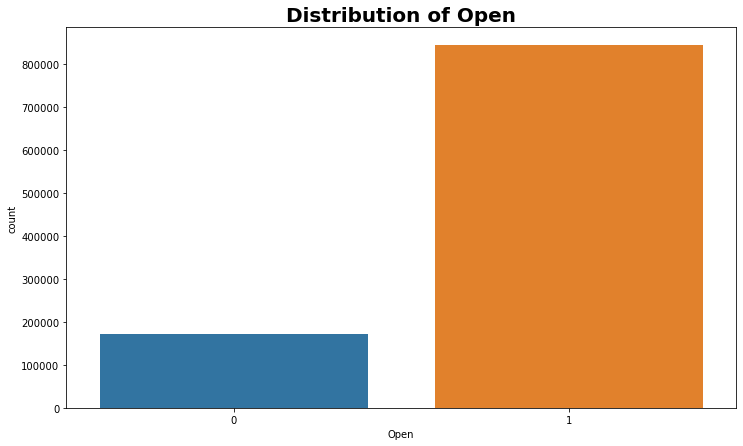

In [161]:
plot_count(train_df, 'Open')

### Promo

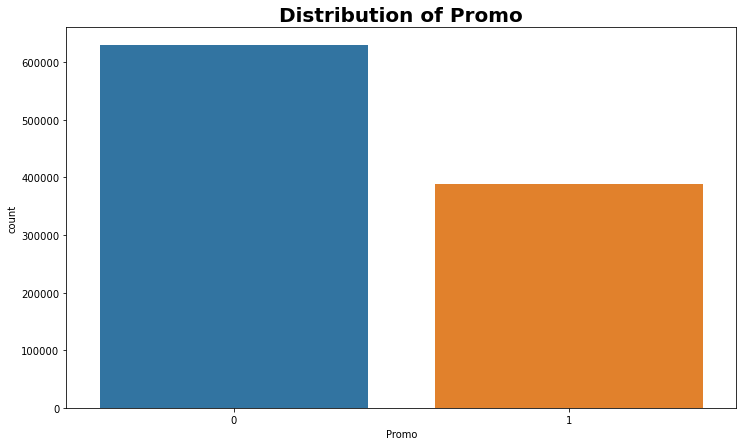

In [162]:
plot_count(train_df, 'Promo')

In [163]:
# unique value counts
counts_df = train_df['StateHoliday'].value_counts()
counts_df

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: Int64

In [164]:
# unique value counts
counts_df = train_df['SchoolHoliday'].value_counts()
counts_df


0    835488
1    181721
Name: SchoolHoliday, dtype: int64

# Bivariate Analysis

#### State holidays and Sales

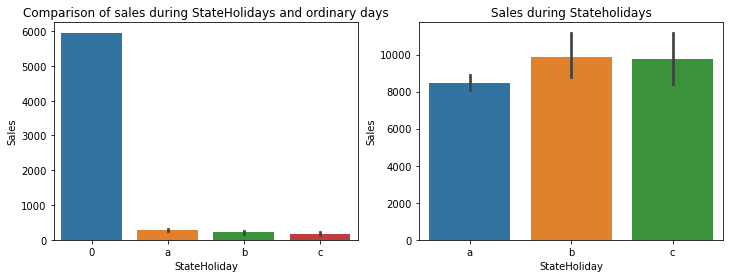

In [170]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='StateHoliday', y='Sales', data=train_df, ax=axis1).set_title('Comparison of sales during StateHolidays and ordinary days')

# holidays only
mask = (train_df["StateHoliday"] != "0") & (train_df["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=train_df[mask], ax=axis2).set_title('Sales during Stateholidays')
plt.show()

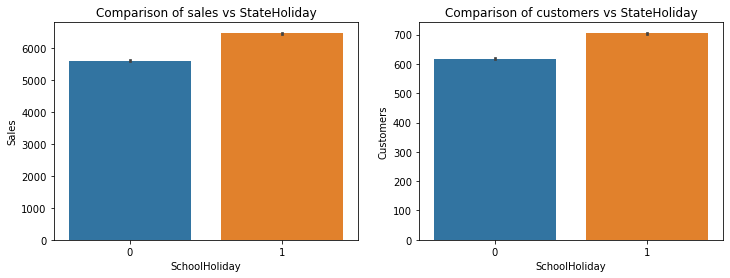

In [171]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=train_df, ax=axis1).set_title('Comparison of sales vs StateHoliday')
sns.barplot(x='SchoolHoliday', y='Customers', data=train_df, ax=axis2).set_title('Comparison of customers vs StateHoliday')
plt.show()

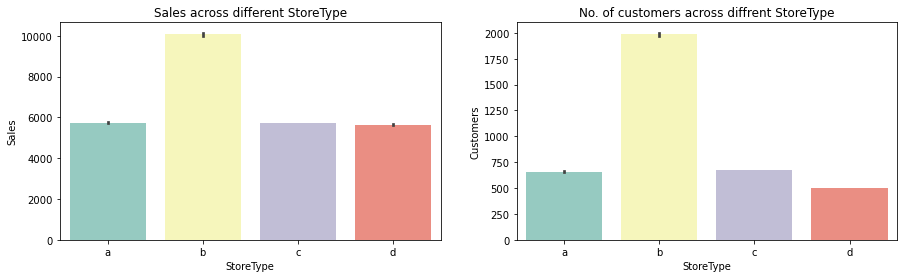

In [178]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data=df, ax=axis1, palette = 'Set3', order=['a','b','c', 'd']).set_title('Sales across different StoreType')
sns.barplot(x='StoreType', y='Customers', data=df, ax=axis2, palette = 'Set3', order=['a','b','c', 'd']).set_title('No. of customers across diffrent StoreType')
plt.show()

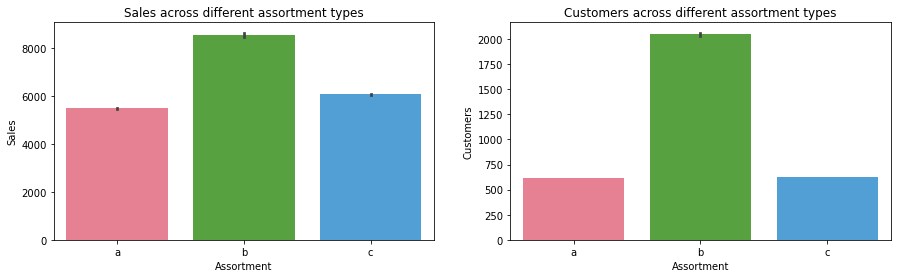

In [179]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=df, palette = 'husl', order=['a','b','c'], ax=axis1).set_title('Sales across different assortment types')
sns.barplot(x='Assortment', y='Customers', data=df, palette = 'husl', order=['a','b','c'], ax=axis2).set_title('Customers across different assortment types')
plt.show()

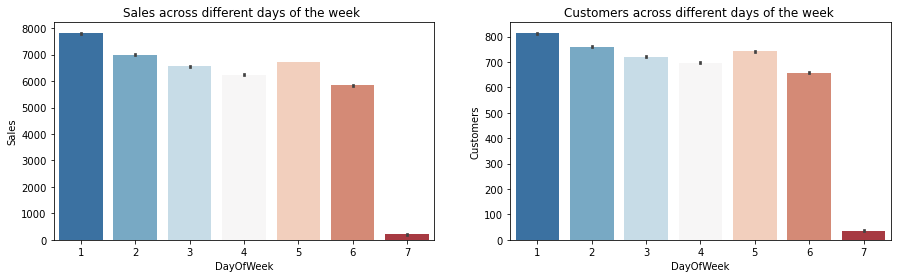

In [180]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=train_df, palette = 'RdBu_r', ax=axis1).set_title('Sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Customers', data=train_df, palette = 'RdBu_r', ax=axis2).set_title('Customers across different days of the week ')
plt.show()